# SymBeam

[SymBeam](https://github.com/amcc1996/symbeam) is a pedagogical Python package for bending diagrams computation, aimed at Mechanical, Civil and Industrial Engineering students.

In [1]:
#!pip install symbeam # uncomment the line if you need to install symbeam to Colab
%matplotlib inline
from symbeam import beam

In [2]:
# Define the length of the beam
new=beam(length = 'L')

# Set the Young modulus and second moment of area of beam segments
new.set_young(x_start = 0, x_end = 'L', value = 210e6)
new.set_inertia(x_start = 0, x_end = 'L', value = 5e-6)

# Add supports. Options are (pin, roller, hinge and fixed)
new.add_support(x_coord = 0, support_type = 'fixed')
new.add_support(x_coord = 'L/2', support_type = 'hinge')
new.add_support(x_coord = '3*L/4', support_type = 'roller')

# Add external loads. Loads can be (point_force, point_moment, or distributed_load)
new.add_point_load(x_coord = 'L', value = '-P')
new.add_point_moment(x_coord = 'L/4', value = 'P*L')
new.add_distributed_load(x_start = 0, x_end = 'L/2', expression = '-P * x / L')

In [3]:
new.solve()


                                    Beam points                                    
     Coordinate              Type                 Load                Moment       
-----------------------------------------------------------------------------------
         0                  Fixed                  0                    0          
        L/4            Continuity point            0                   L*P         
        L/2                 Hinge                  0                    0          
       3*L/4                Roller                 0                    0          
         L             Continuity point            -P                   0          


                                   Beam segments                                   
        Span            Young modulus           Inertia          Distributed load  
-----------------------------------------------------------------------------------
 [   0   -  L/4  ]     210000000.000000   5.00000000000000e-6         -P*

(<Figure size 504x576 with 4 Axes>,
 [<Axes: >,
  <Axes: ylabel='Shear force, $V(x)$'>,
  <Axes: ylabel='Bending moment, $M(x)$'>,
  <Axes: xlabel='Coordinate, $x$', ylabel='Deflection, $v(x)$'>])

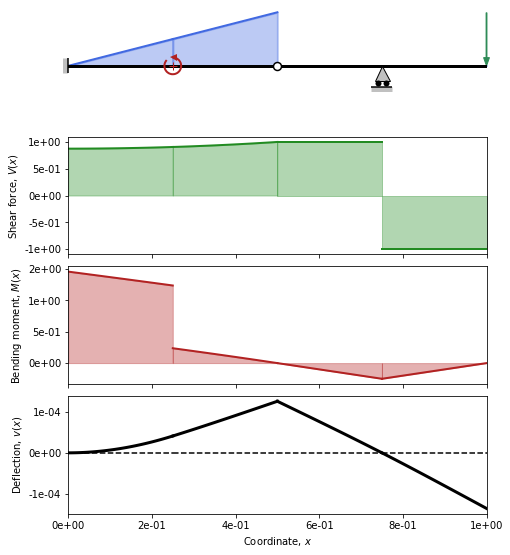

In [4]:
new.plot()